In [1]:
import numpy as np
from qiskit import QuantumRegister, QuantumCircuit, assemble, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

In [2]:
# This function constructs a quantum circuit that demonstrates 
# phase kickback. It initializes two qubits in a quantum register,
# applies quantum gates to create superposition, and then 
# prepares the circuit for further operations.
def phase_kickback():
    # Create a quantum register with 2 qubits named 'q'
    qreg = QuantumRegister(2, 'q')
    # Create a classical register with 2 bits named 'c'    
    creg = ClassicalRegister(2, 'c')
    # Initialize a quantum circuit using the defined quantum and classical  
    # registers
    qc   = QuantumCircuit(qreg, creg)

    # Apply a Hadamard gate to the first qubit to create superposition
    qc.h(qreg[0])
    # Apply an X gate (bit-flip) to the second qubit
    qc.x(qreg[1])
    # Apply a Hadamard gate to the second qubit
    qc.h(qreg[1])

    # Return circuit
    return qc

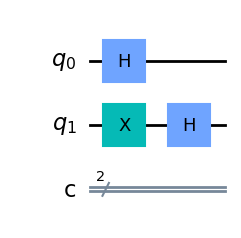

In [3]:
circ = phase_kickback()
circ.draw('mpl')

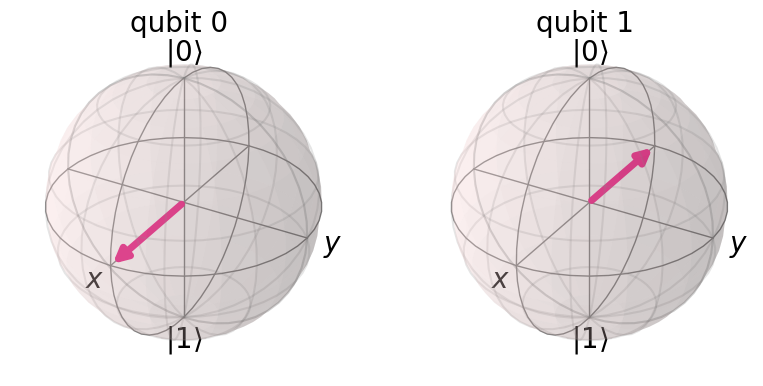

In [4]:
statevector = Statevector(circ)
plot_bloch_multivector(statevector)

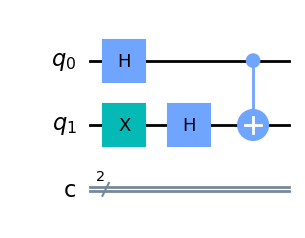

In [5]:
# Apply CNOT, or controlled X – qubit 0 (q0) is control and qubit 1 (q1) is target.
circ.cx(0,1)
circ.draw('mpl')

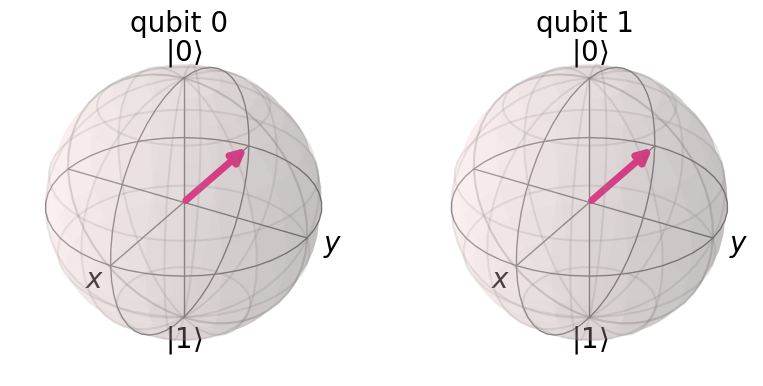

In [6]:
statevector = Statevector(circ)
plot_bloch_multivector(statevector)

In [14]:
# launch q0 in superposition and initiate flip q1 to |1⟩┤
def phase_kickback():
    qreg = QuantumRegister(2, 'q')
    creg = ClassicalRegister(2, 'c')
    qc   = QuantumCircuit(qreg, creg)

    # Apply Hadamard gate to create superposition
    qc.h(qreg[0])
    # Apply X gate for bit-flip
    qc.x(qreg[1])
    # Return circuit
    return qc

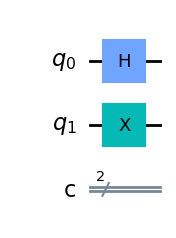

In [15]:
circ = phase_kickback()
circ.draw('mpl')

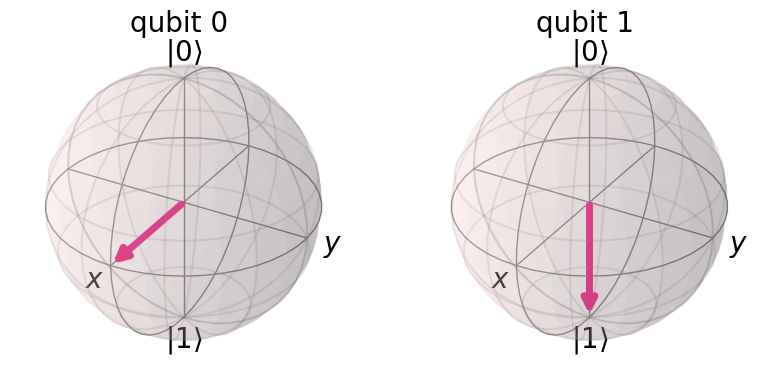

In [16]:
statevector = Statevector(circ)
plot_bloch_multivector(statevector)

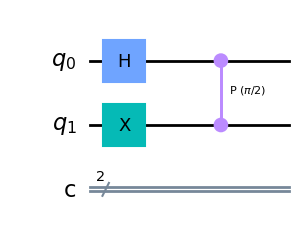

In [17]:
# Apply controlled S gate.
circ.cp(np.pi/2, 0, 1)	# where circ.cp is controlled phase shift,
# np.pi/2 is the angle in radians, 0 and 1 are q0 and q1
# respectively.
circ.draw('mpl')

<IPython.core.display.Latex object>

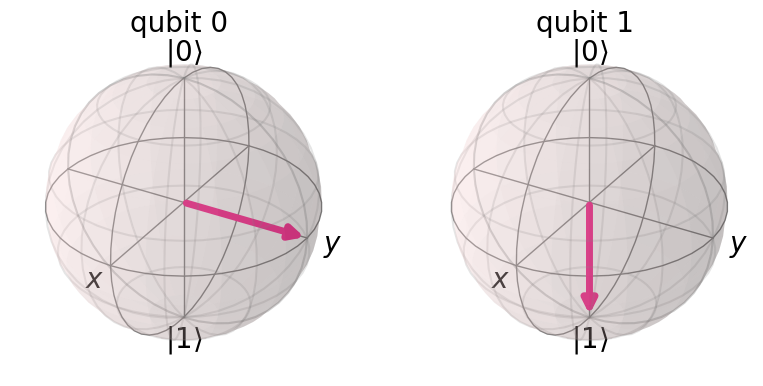

In [18]:
# Display the state vector
svsim = Aer.get_backend('aer_simulator')
circ.save_statevector()
qobj = assemble(circ)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

In [12]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(circ)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

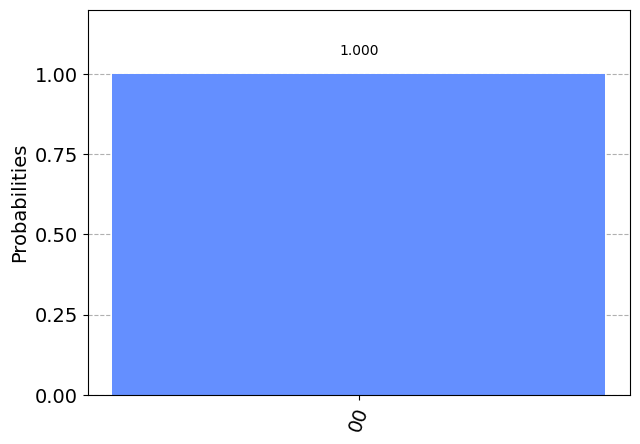

In [13]:
plot_histogram(answer)